### 0. Import Dependencies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('stock.csv')

In [3]:
df.head()  # Display the first few rows of the DataFrame

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [5]:
df.describe()  # Get a statistical summary of the DataFrame

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [ ]:
# what should I do next?
# You can perform various analyses or visualizations on the DataFrame.
# For example, you might want to plot the stock prices over time or check for missing values.
# If you have specific tasks in mind, please let me know!

# i want to conduct time series analysis on the stock data
# You can start by checking for trends, seasonality, and stationarity in the stock prices.
# You might also want to visualize the stock prices over time, decompose the time series,
# and apply models like ARIMA or Prophet for forecasting.
# If you need help with specific steps, feel free to ask!

# Can you list out the steps I should take to conduct time series analysis on the stock data?
# Sure! Here are the steps you can follow to conduct time series analysis on the stock data:
# 1. **Visualize the Data**: Plot the stock prices over time to identify trends and patterns.
# 2. **Check for Stationarity**: Use statistical tests like the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.
# 3. **Decompose the Time Series**: Break down the time series into trend, seasonality, and residual components using decomposition methods.
# 4. **Handle Missing Values**: If there are missing values, decide how to handle them (e.g., interpolation, forward fill).
# 5. **Transform the Data**: If necessary, apply transformations (e.g., differencing, logarithmic) to stabilize variance and make the series stationary.
# 6. **Model Selection**: Choose a suitable time series model (e.g., ARIMA, SARIMA, Prophet)
# based on the characteristics of the data.
# 7. **Model Fitting**: Fit the selected model to the data.
# 8. **Model Diagnostics**: Check the residuals of the model to ensure they are white noise.
# 9. **Forecasting**: Use the fitted model to make forecasts for future stock prices.
# 10. **Evaluate the Model**: Compare the forecasts with actual values (if available) using metrics like RMSE or MAE.
# 11. **Visualize Forecasts**: Plot the forecasts along with the historical data to visualize the predictions.
# 12. **Iterate**: Based on the results, you may need to iterate through some of the steps to refine your analysis or model.
# If you need help with any specific step, please let me know, and I can provide more detailed guidance or code examples!


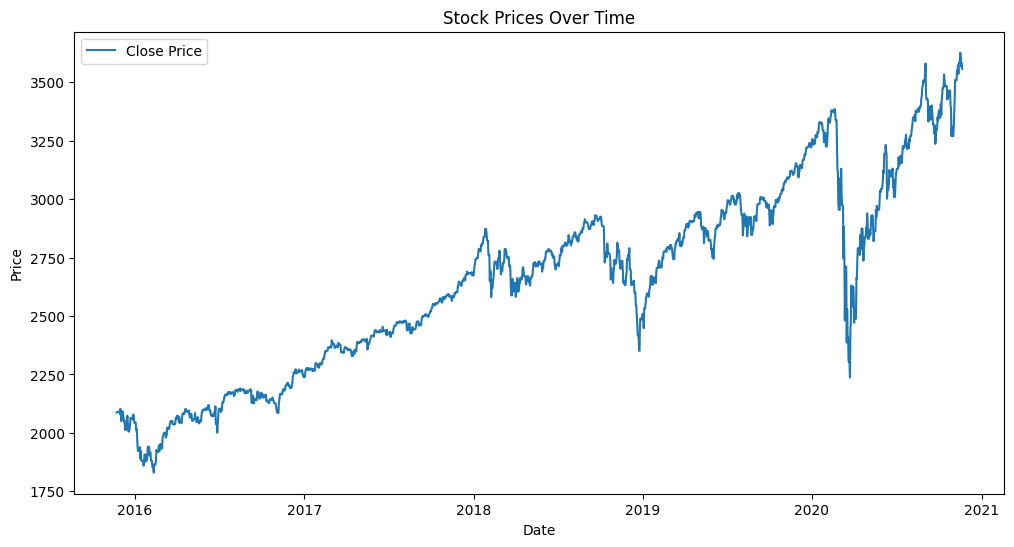

In [ ]:
# 1. **Visualize the Data**: Plot the stock prices over time to identify trends and patterns.
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# 2. **Check for Stationarity**: Use statistical tests like the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")
check_stationarity(df['Close'])

ADF Statistic: -0.8703973870161114
p-value: 0.7975646340657572
The time series is not stationary.


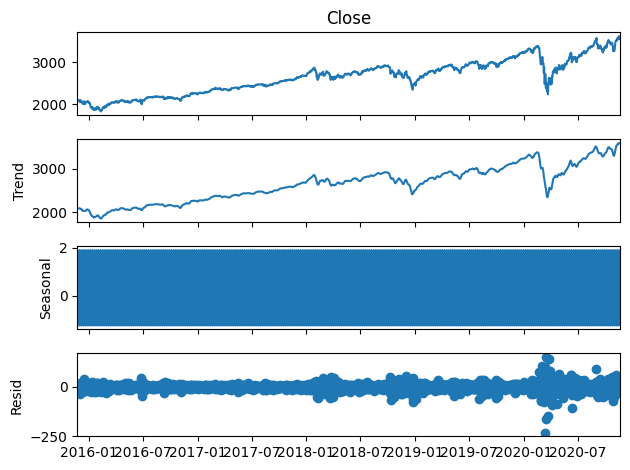

In [10]:
# 3. **Decompose the Time Series**: Break down the time series into trend, seasonality, and residual components using decomposition methods.
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df['Close'], model='additive')
decomposition.plot()
plt.show()

In [11]:
# 4. **Handle Missing Values**: If there are missing values, decide how to handle them (e.g., interpolation, forward fill).
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [12]:
# 5. **Transform the Data**: If necessary, apply transformations (e.g., differencing, logarithmic) to stabilize variance and make the series stationary.
# Example: Differencing the series to remove trend
df['Close_diff'] = df['Close'].diff().dropna()

In [13]:
# 6. **Model Selection**: Choose a suitable time series model (e.g., ARIMA, SARIMA, Prophet) based on the characteristics of the data.
# You can use the ARIMA model for this example.
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


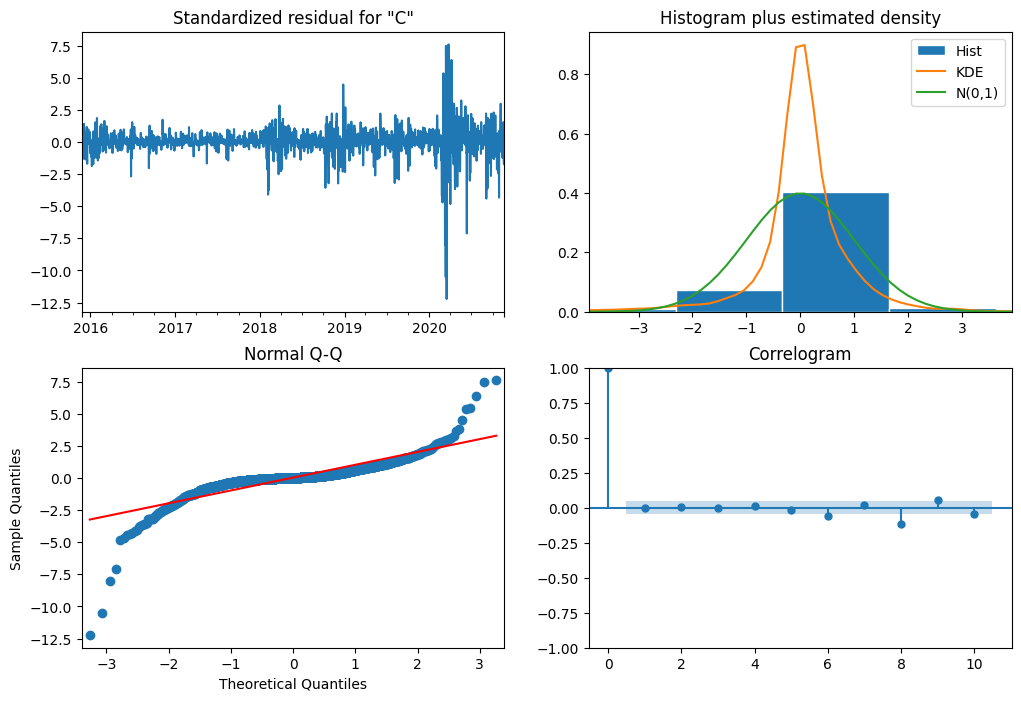

In [14]:
# 8. **Model Diagnostics**: Check the residuals of the model to ensure they are white noise.
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

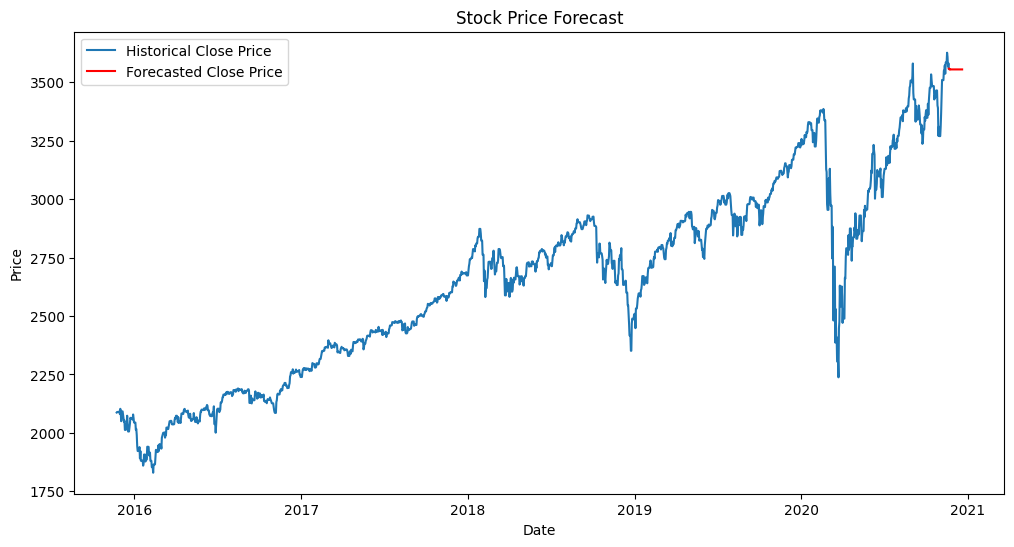

In [18]:
# 9. **Forecasting**: Use the fitted model to make forecasts for future stock prices.
forecast = model_fit.forecast(steps=30)  # Forecasting the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Close Price')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), forecast, label='Forecasted Close Price', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
# 10. **Evaluate the Model**: Compare the forecasts with actual values (if available) using metrics like RMSE or MAE.
# This step requires actual future values to compare against the forecasted values.
# Split the data into training and testing sets if you have future actual values.
# create a seperate test set for evaluation
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 278.60489083190834


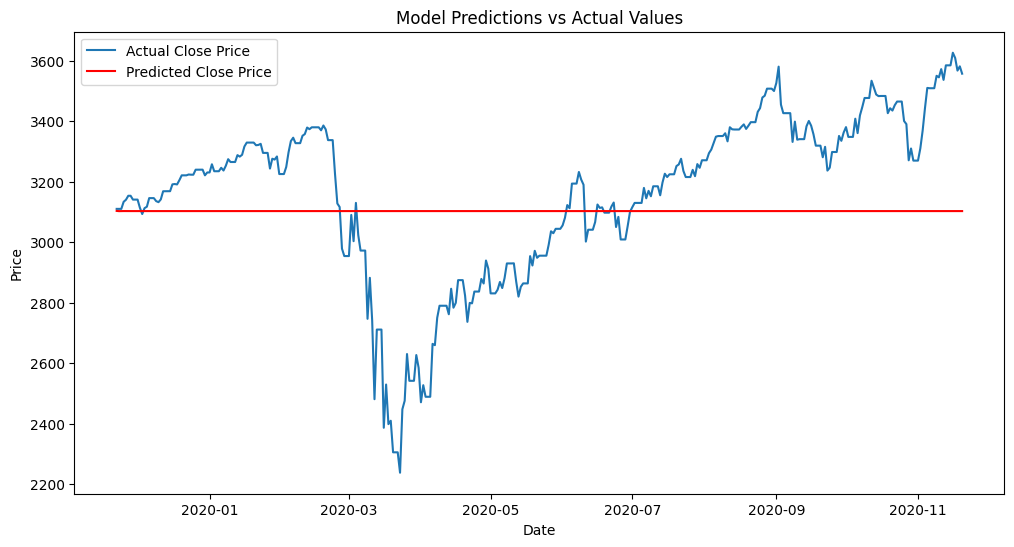

In [21]:
# now you can continue with the evaluation of the model using the test set
# continue with the evaluation of the model using the test set
# For example, you can calculate RMSE or MAE between the forecasted values and the actual values in the test set.
from sklearn.metrics import mean_squared_error
predictions = model_fit.forecast(steps=len(test))
rmse = mean_squared_error(test, predictions) ** 0.5
print(f'RMSE: {rmse}')
# You can also plot the predictions against the actual values to visualize the model's performance.
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Close Price')
plt.plot(test.index, predictions, label='Predicted Close Price', color='red')
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()